## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,precision_recall_fscore_support,ConfusionMatrixDisplay,confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading Dataset

In [2]:
dataframe = pd.read_csv("risk_factors_cervical_cancer.csv")

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [4]:
dataframe.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## Converting "?" to numpy NaN

In [5]:
dataframe[dataframe == "?"] = np.nan

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

## Droping Columns which contains a lot of null values

In [7]:
dataframe.drop(columns=["STDs: Time since first diagnosis","STDs: Time since last diagnosis"],inplace=True)

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

## Seperating different data types for next steps

In [9]:
boolean_columns = dataframe.iloc[:,[4,7,9,11,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33]]
int_columns = dataframe.iloc[:,[0,1,2,3,5,6,8,10,12,25]]

In [10]:
int_columns

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0
3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0
4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
854,32,2.0,19.0,1.0,0.0,0.0,8.0,0.0,0.0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.08,0.0,0.0,0
856,33,2.0,24.0,2.0,0.0,0.0,0.08,0.0,0.0,0


## Filling null boolean values with most frequent value

In [11]:
imp_for_boolean = SimpleImputer(strategy="most_frequent")

In [12]:
array_boolean = imp_for_boolean.fit_transform(boolean_columns)

In [13]:
bolean_df = pd.DataFrame(array_boolean,columns=boolean_columns.columns)
change_type = {"0.0":0,"1.0":1}
bolean_df.replace(change_type,inplace=True)

## Filling null int values with mean of the column

In [14]:
imp_for_int = SimpleImputer(strategy="mean")
int_array = (imp_for_int.fit_transform(int_columns))

In [15]:
int_df = pd.DataFrame(int_array,columns=int_columns.columns)
int_df = int_df.astype(np.int64)

## Concatenate Two dataframes

In [16]:
df = pd.concat([int_df,bolean_df],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 858 non-null    int64
 1   Number of sexual partners           858 non-null    int64
 2   First sexual intercourse            858 non-null    int64
 3   Num of pregnancies                  858 non-null    int64
 4   Smokes (years)                      858 non-null    int64
 5   Smokes (packs/year)                 858 non-null    int64
 6   Hormonal Contraceptives (years)     858 non-null    int64
 7   IUD (years)                         858 non-null    int64
 8   STDs (number)                       858 non-null    int64
 9   STDs: Number of diagnosis           858 non-null    int64
 10  Smokes                              858 non-null    int64
 11  Hormonal Contraceptives             858 non-null    int64
 12  IUD     

# Split Data Features and Labels

In [18]:
X = df.iloc[:,:30]
Hinselmann = df.iloc[:,30]
Schiller = df.iloc[:,31]
Citology = df.iloc[:,32]
Biopsy = df.iloc[:,33]

In [19]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,37,37,3,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,46,3,21,4,0,0,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split data as Training and Testing

In [20]:
X_trainH,X_testH,y_trainH,y_testH = train_test_split(X,Hinselmann,test_size=0.33,random_state=42)
X_trainS,X_testS,y_trainS,y_testS = train_test_split(X,Schiller,test_size=0.33,random_state=42)
X_trainC,X_testC,y_trainC,y_testC = train_test_split(X,Citology,test_size=0.33,random_state=42)
X_trainB,X_testB,y_trainB,y_testB = train_test_split(X,Biopsy,test_size=0.33,random_state=42)

<h1 style="color:green;">Naive Bayes</h1>

## Naive Bayes for classification of Hinselmann target variable

In [21]:
modelh = ComplementNB()

modelh.fit(X_trainH,y_trainH)

ypredH = modelh.predict(X_testH)

In [22]:
print(confusion_matrix(y_testH,ypredH))

[[252  20]
 [ 10   2]]


In [23]:
print(metrics.accuracy_score(y_testH,ypredH))

0.8943661971830986


## Naive Bayes for classification of Schiller target variable

In [24]:
models = ComplementNB()

models.fit(X_trainS,y_trainS)

ypredS = models.predict(X_testS)

In [25]:
print(confusion_matrix(y_testS,ypredS))

[[217  43]
 [ 14  10]]


In [26]:
print(metrics.accuracy_score(y_testS,ypredS))

0.7992957746478874


## Naive Bayes for classification of Citology target variable

In [27]:
modelc = ComplementNB()

modelc.fit(X_trainC,y_trainC)

ypredC = models.predict(X_testC)

In [28]:
print(confusion_matrix(y_testC,ypredC))

[[223  49]
 [  8   4]]


In [29]:
print(metrics.accuracy_score(y_testC,ypredC))

0.7992957746478874


## Naive Bayes for classification of Biopsy target variable

In [30]:
modelb = ComplementNB()

modelb.fit(X_trainB,y_trainB)

ypredB = modelb.predict(X_testB)

In [31]:
print(confusion_matrix(y_testB,ypredB))

[[239  27]
 [ 13   5]]


In [32]:
print(metrics.accuracy_score(y_testB,ypredB))

0.8591549295774648


<h1 style="color:green;">Naive Bayes with RFE</h1>

## Naive Bayes for classification of Hinselmann target variable

In [33]:
model = ComplementNB()

rfe = RFE(estimator=model,n_features_to_select=25)

pipeline = Pipeline(steps=[("s",rfe),("m",model)])

pipeline.fit(X_trainH,y_trainH)

ypredh = pipeline.predict(X_testH)

In [34]:
print(classification_report(y_testH,ypredh))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       272
           1       0.14      0.25      0.18        12

    accuracy                           0.90       284
   macro avg       0.55      0.59      0.56       284
weighted avg       0.93      0.90      0.91       284



In [35]:
nb_hinselmann = metrics.accuracy_score(y_testH,ypredh)

In [36]:
print(nb_hinselmann)

0.9014084507042254


In [37]:
print(confusion_matrix(y_testH,ypredh))

[[253  19]
 [  9   3]]


## Naive Bayes for classification of Schiller target variable

In [38]:
model2 = ComplementNB()

rfe2 = RFE(estimator=model2,n_features_to_select=15)

pipeline2 = Pipeline(steps=[("s",rfe2),("m",model2)])

pipeline2.fit(X_trainS,y_trainS)

ypreds = pipeline2.predict(X_testS)

In [39]:
clf_report_2 = classification_report(y_testS,ypreds)

In [40]:
print(clf_report_2)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       260
           1       0.36      0.21      0.26        24

    accuracy                           0.90       284
   macro avg       0.64      0.59      0.61       284
weighted avg       0.88      0.90      0.89       284



In [41]:
print(confusion_matrix(y_testS,ypreds))

[[251   9]
 [ 19   5]]


In [42]:
nb_schiller = metrics.accuracy_score(y_testS,ypreds)

In [43]:
print(nb_schiller)

0.9014084507042254


## Naive Bayes for classification of Citology target variable

In [44]:
model3 = ComplementNB()

rfe3 = RFE(estimator=model3,n_features_to_select=23)

pipeline3 = Pipeline(steps=[("s",rfe3),("m",model3)])

pipeline3.fit(X_trainC,y_trainC)

ypredc = pipeline3.predict(X_testC)

In [45]:
clf_report_3 = classification_report(y_testC,ypredc)

In [46]:
print(clf_report_3)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       272
           1       0.05      0.08      0.06        12

    accuracy                           0.90       284
   macro avg       0.51      0.51      0.51       284
weighted avg       0.92      0.90      0.91       284



In [47]:
print(confusion_matrix(y_testC,ypredc))

[[254  18]
 [ 11   1]]


In [48]:
nb_citology = metrics.accuracy_score(y_testC,ypredc)

In [49]:
print(nb_citology)

0.897887323943662


## Naive Bayes for classification of Biopsy target variable

In [50]:
model4 = ComplementNB()

rfe4 = RFE(estimator=model4,n_features_to_select=21)

pipeline4 = Pipeline(steps=[("s",rfe4),("m",model4)])

pipeline4.fit(X_trainB,y_trainB)

ypredb = pipeline4.predict(X_testB)

In [51]:
print(metrics.accuracy_score(y_testB,ypredb))

0.9154929577464789


In [52]:
clf_report_4 = classification_report(y_testB,ypredb)

In [53]:
print(clf_report_4)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       266
           1       0.25      0.17      0.20        18

    accuracy                           0.92       284
   macro avg       0.60      0.57      0.58       284
weighted avg       0.90      0.92      0.91       284



In [54]:
print(confusion_matrix(y_testB,ypredb))

[[257   9]
 [ 15   3]]


In [55]:
nb_biopsy = metrics.accuracy_score(y_testB,ypredb)

In [56]:
print(nb_biopsy)

0.9154929577464789


<h1 style="color:green;">K Nearest Neighbors</h1>

## K Nearest Neighbors for classification of Hinselmann target variable

In [57]:
knnH = neighbors.KNeighborsClassifier()

In [58]:
knnH.fit(X_trainH,y_trainH)

KNeighborsClassifier()

In [59]:
y_predH = knnH.predict(X_testH)

In [60]:
cmH = confusion_matrix(y_testH,y_predH)

In [61]:
cmH

array([[272,   0],
       [ 12,   0]], dtype=int64)

In [62]:
crpH = classification_report(y_testH,y_predH
                           ,zero_division=1)

In [63]:
knn_hinselmann = metrics.accuracy_score(y_testH,y_predH)

In [64]:
print(knn_hinselmann)

0.9577464788732394


## K Nearest Neighbors for classification of Schiller target variable

In [65]:
knnS = neighbors.KNeighborsClassifier()

In [66]:
knnS.fit(X_trainS,y_trainS)

KNeighborsClassifier()

In [67]:
y_predS = knnS.predict(X_testS)

In [68]:
confusion_matrix(y_testS,y_predS)

array([[258,   2],
       [ 22,   2]], dtype=int64)

In [69]:
print(classification_report(y_testS,y_predS))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       260
           1       0.50      0.08      0.14        24

    accuracy                           0.92       284
   macro avg       0.71      0.54      0.55       284
weighted avg       0.89      0.92      0.89       284



In [70]:
knn_schiller = metrics.accuracy_score(y_testS,y_predS)

## K Nearest Neighbors for classification of Citology target variable

In [71]:
knnC = neighbors.KNeighborsClassifier()

In [72]:
knnC.fit(X_trainC,y_trainC)

KNeighborsClassifier()

In [73]:
y_predC = knnC.predict(X_testC)

In [74]:
confusion_matrix(y_testC,y_predC)

array([[272,   0],
       [ 12,   0]], dtype=int64)

In [75]:
print(classification_report(y_testC,y_predC,zero_division=1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       1.00      0.00      0.00        12

    accuracy                           0.96       284
   macro avg       0.98      0.50      0.49       284
weighted avg       0.96      0.96      0.94       284



In [76]:
knn_citology = metrics.accuracy_score(y_testC,y_predC)

## K Nearest Neighbors for classification of Biopsy target variable

In [77]:
knnB = kNN()

In [78]:
knnB.fit(X_trainB,y_trainB)

KNeighborsClassifier()

In [79]:
y_predB = knnB.predict(X_testB)

In [80]:
confusion_matrix(y_testB,y_predB)

array([[266,   0],
       [ 18,   0]], dtype=int64)

In [81]:
print(classification_report(y_testB,y_predB,zero_division=1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       266
           1       1.00      0.00      0.00        18

    accuracy                           0.94       284
   macro avg       0.97      0.50      0.48       284
weighted avg       0.94      0.94      0.91       284



In [82]:
knn_biopsy = metrics.accuracy_score(y_testB,y_predB)

<h1 style="color:green;">Decision Tree</h1>

## Decision Tree for classification of Hinselmann target variable

In [83]:
dclfH = DecisionTreeClassifier()

In [84]:
dclfH.fit(X_trainH,y_trainH)

DecisionTreeClassifier()

In [85]:
y_predH = dclfH.predict(X_testH)

In [86]:
crt = classification_report(y_testH,y_predH)

In [87]:
print(crt)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       272
           1       0.08      0.08      0.08        12

    accuracy                           0.92       284
   macro avg       0.52      0.52      0.52       284
weighted avg       0.92      0.92      0.92       284



In [88]:
dt_hinselmann = metrics.accuracy_score(y_testH,y_predH)
print(dt_hinselmann)

0.9190140845070423


In [89]:
print(confusion_matrix(y_testH,y_predH))

[[260  12]
 [ 11   1]]


## Decision Tree for classification of Schiller target variable

In [90]:
dclfS = DecisionTreeClassifier()

In [91]:
dclfS.fit(X_trainS,y_trainS)

DecisionTreeClassifier()

In [92]:
y_predS = dclfS.predict(X_testS)

In [93]:
crt2 = classification_report(y_testS,y_predS)

In [94]:
print(crt2)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       260
           1       0.11      0.12      0.12        24

    accuracy                           0.84       284
   macro avg       0.51      0.51      0.51       284
weighted avg       0.85      0.84      0.84       284



In [95]:
cmS = confusion_matrix(y_testS,y_predS)
print(cmS)

[[235  25]
 [ 21   3]]


In [96]:
cmdS = ConfusionMatrixDisplay(confusion_matrix = cmS,display_labels=[0,1])

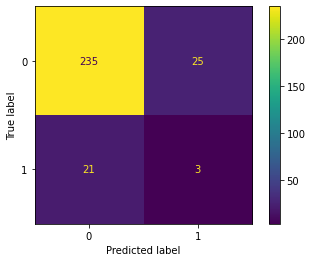

In [97]:
cmdS.plot()

In [98]:
dt_schiller = metrics.accuracy_score(y_testS,y_predS)

## Decision Tree for classification of Citology target variable

In [99]:
dclfC = DecisionTreeClassifier(random_state=0)

In [100]:
dclfC.fit(X_trainC,y_trainC)

DecisionTreeClassifier(random_state=0)

In [101]:
y_predC = dclfC.predict(X_testC)

In [102]:
clrC = classification_report(y_testC,y_predC)
print(clrC)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       272
           1       0.13      0.25      0.17        12

    accuracy                           0.90       284
   macro avg       0.55      0.59      0.56       284
weighted avg       0.93      0.90      0.91       284



In [103]:
cmC = confusion_matrix(y_testC,y_predC)
print(cmC)

[[252  20]
 [  9   3]]


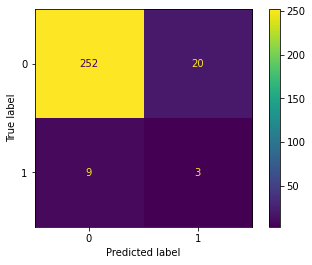

In [104]:
cmdC = ConfusionMatrixDisplay(confusion_matrix=cmC,display_labels=[0,1])
cmdC.plot()

In [105]:
dt_citology = metrics.accuracy_score(y_testC,y_predC)

## Decision Tree for classification of Biopsy target variable

In [106]:
dclfB = DecisionTreeClassifier(random_state=0)

In [107]:
dclfB.fit(X_trainB,y_trainB)

DecisionTreeClassifier(random_state=0)

In [108]:
y_predB = dclfB.predict(X_testB)

In [109]:
cmB = confusion_matrix(y_testB,y_predB)

In [110]:
clrB = classification_report(y_testB,y_predB)
print(clrB)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       266
           1       0.40      0.22      0.29        18

    accuracy                           0.93       284
   macro avg       0.67      0.60      0.62       284
weighted avg       0.91      0.93      0.92       284



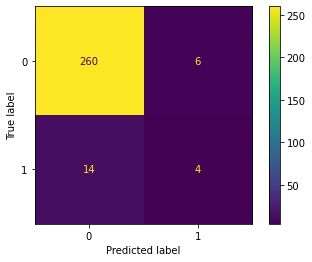

In [111]:
cmdB = ConfusionMatrixDisplay(confusion_matrix=cmB,display_labels=[0,1])
cmdB.plot()

In [112]:
dt_biopsy = metrics.accuracy_score(y_testB,y_predB)

<h1 style="color:green">Random Forest</h1>

## Random Forest for classification of Hinselmann target variable

In [113]:
rfcH = RandomForestClassifier(random_state=0)

In [114]:
rfcH.fit(X_trainH,y_trainH)

RandomForestClassifier(random_state=0)

In [115]:
y_predH = rfcH.predict(X_testH)

In [116]:
cmH = confusion_matrix(y_testH,y_predH)
print(cmH)

[[272   0]
 [ 12   0]]


In [117]:
clrH = classification_report(y_testH,y_predH,zero_division=1)

In [118]:
print(clrH)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       1.00      0.00      0.00        12

    accuracy                           0.96       284
   macro avg       0.98      0.50      0.49       284
weighted avg       0.96      0.96      0.94       284



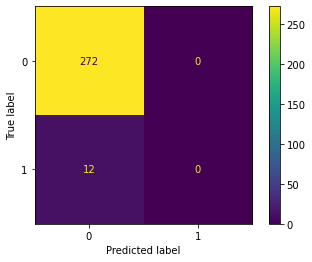

In [119]:
cmdH = ConfusionMatrixDisplay(confusion_matrix=cmH,display_labels=[0,1])
cmdH.plot()

In [120]:
rf_hinselmann = metrics.accuracy_score(y_testH,y_predH)

## Random Forest for classification of Schiller target variable

In [121]:
rfcS = RandomForestClassifier(random_state=0)

In [122]:
rfcS.fit(X_trainS,y_trainS)

RandomForestClassifier(random_state=0)

In [123]:
y_predS = rfcS.predict(X_testS)

In [124]:
cmS = confusion_matrix(y_testS,y_predS)

In [125]:
clrS = classification_report(y_testS,y_predS)
print(clrS)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       260
           1       0.75      0.12      0.21        24

    accuracy                           0.92       284
   macro avg       0.84      0.56      0.59       284
weighted avg       0.91      0.92      0.90       284



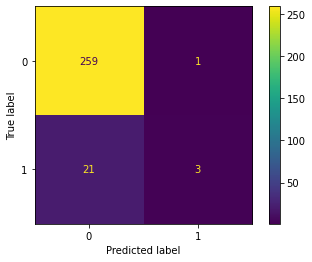

In [126]:
cmdS = ConfusionMatrixDisplay(confusion_matrix=cmS,display_labels=[0,1])
cmdS.plot()

In [127]:
rf_schiller = metrics.accuracy_score(y_testS,y_predS)

## Random Forest for classification of Citology target variable

In [128]:
rfcC = RandomForestClassifier(random_state=0)

In [129]:
rfcC.fit(X_trainC,y_trainC)

RandomForestClassifier(random_state=0)

In [130]:
y_predC = rfcC.predict(X_testC)

In [131]:
cmC = confusion_matrix(y_testC,y_predC)

In [132]:
clrC = classification_report(y_testC,y_predC)
print(clrC)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       0.50      0.08      0.14        12

    accuracy                           0.96       284
   macro avg       0.73      0.54      0.56       284
weighted avg       0.94      0.96      0.94       284



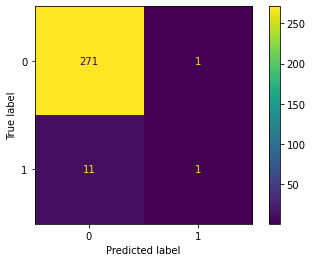

In [133]:
cmdC = ConfusionMatrixDisplay(confusion_matrix=cmC,display_labels=[0,1])
cmdC.plot()

In [134]:
rf_citology = metrics.accuracy_score(y_testC,y_predC)

## Random Forest for classification of Biopsy target variable

In [135]:
rfcB = RandomForestClassifier(random_state=0)

In [136]:
rfcB.fit(X_trainB,y_trainB)

RandomForestClassifier(random_state=0)

In [137]:
y_predB = rfcB.predict(X_testB)

In [138]:
cmB = confusion_matrix(y_testB,y_predB)

In [139]:
print(cmB)

[[265   1]
 [ 16   2]]


In [140]:
clrB = classification_report(y_testB,y_predB)

In [141]:
print(clrB)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       266
           1       0.67      0.11      0.19        18

    accuracy                           0.94       284
   macro avg       0.80      0.55      0.58       284
weighted avg       0.93      0.94      0.92       284



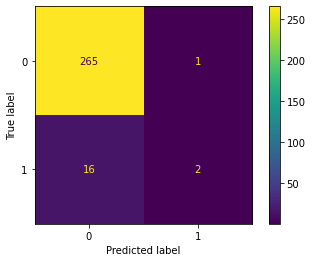

In [142]:
cmdB = ConfusionMatrixDisplay(confusion_matrix=cmB,display_labels=[0,1])
cmdB.plot()

In [143]:
rf_biopsy = metrics.accuracy_score(y_testB,y_predB)

<h1 style="color:green">Support Vector Machines</h1>

## Support Vector Machines for classification of Hinselmann target variable

In [144]:
svmH = svm.SVC()

In [145]:
svmH.fit(X_trainH,y_trainH)

SVC()

In [146]:
y_predH = svmH.predict(X_testH)

In [147]:
cmH = confusion_matrix(y_testH,y_predH)

In [148]:
clrH = classification_report(y_testH,y_predH,zero_division=1)
print(clrH)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       1.00      0.00      0.00        12

    accuracy                           0.96       284
   macro avg       0.98      0.50      0.49       284
weighted avg       0.96      0.96      0.94       284



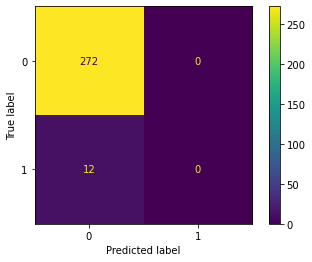

In [149]:
cmdH = ConfusionMatrixDisplay(confusion_matrix=cmH,display_labels=[0,1])
cmdH.plot()

In [150]:
svm_hinselmann = metrics.accuracy_score(y_testH,y_predH)
print(svm_hinselmann)

0.9577464788732394


## Support Vector Machines for classification of Schiller target variable

In [151]:
svmS = svm.SVC()

In [152]:
svmS.fit(X_trainS,y_trainS)

SVC()

In [153]:
y_predS = svmS.predict(X_testS)

In [154]:
cmS = confusion_matrix(y_testS,y_predS)

In [155]:
clrS = classification_report(y_testS,y_predS,zero_division=1)
print(clrS)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       260
           1       1.00      0.00      0.00        24

    accuracy                           0.92       284
   macro avg       0.96      0.50      0.48       284
weighted avg       0.92      0.92      0.88       284



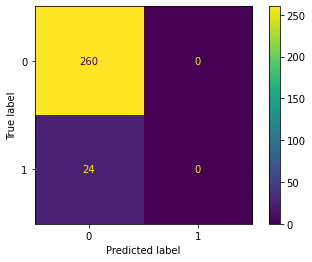

In [156]:
cmdS = ConfusionMatrixDisplay(confusion_matrix=cmS,display_labels=[0,1])
cmdS.plot()

In [157]:
svm_schiller = metrics.accuracy_score(y_testS,y_predS)

## Support Vector Machines for classification of Citology target variable

In [158]:
svmC = svm.SVC()

In [159]:
svmC.fit(X_trainC,y_trainC)

SVC()

In [160]:
y_predC = svmC.predict(X_testC)

In [161]:
cmC = confusion_matrix(y_testC,y_predC)

In [162]:
clrC = classification_report(y_testC,y_predC,zero_division=1)
print(clrC)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       1.00      0.00      0.00        12

    accuracy                           0.96       284
   macro avg       0.98      0.50      0.49       284
weighted avg       0.96      0.96      0.94       284



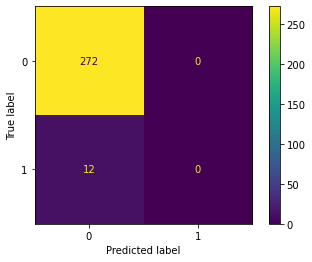

In [163]:
cmdC = ConfusionMatrixDisplay(confusion_matrix=cmC,display_labels=[0,1])
cmdC.plot()

In [164]:
svm_citology = metrics.accuracy_score(y_testC,y_predC)

## Support Vector Machines for classification of __Biopsy__ target variable

In [165]:
svmB = svm.SVC()

In [166]:
svmB.fit(X_trainB,y_trainB)

SVC()

In [167]:
y_predB = svmB.predict(X_testB)

In [168]:
cmB = confusion_matrix(y_testB,y_predB)

In [169]:
print(cmB)

[[266   0]
 [ 18   0]]


In [170]:
clrB = classification_report(y_testB,y_predB,zero_division=1)

In [171]:
print(clrB)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       266
           1       1.00      0.00      0.00        18

    accuracy                           0.94       284
   macro avg       0.97      0.50      0.48       284
weighted avg       0.94      0.94      0.91       284



In [172]:
cmdB = ConfusionMatrixDisplay(confusion_matrix=cmB,display_labels=[0,1])

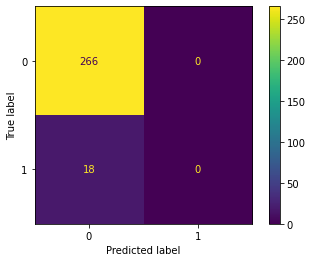

In [173]:
cmdB.plot()

In [174]:
svm_biopsy = metrics.accuracy_score(y_testB,y_predB)

<h1 style="color:green">Logistic Regression</h1>

## Logistic Regression for Hinselmann target variable

In [175]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [176]:
model.fit(X_trainH,y_trainH)

LogisticRegression(max_iter=1000)

In [177]:
y_pred = model.predict(X_testH)

In [178]:
lr_hinselmann = metrics.accuracy_score(y_testH,y_pred)

In [179]:
print(confusion_matrix(y_testH,y_pred))

[[272   0]
 [ 12   0]]


## Logistic Regression for Schiller target variable

In [180]:
lr_model2 = LogisticRegression(solver="lbfgs", max_iter=1000)

In [181]:
lr_model2.fit(X_trainS,y_trainS)

LogisticRegression(max_iter=1000)

In [182]:
y_pred2 = lr_model2.predict(X_testS)

In [183]:
lr_schiller = metrics.accuracy_score(y_testS,y_pred2)

In [184]:
print(lr_schiller)
print(confusion_matrix(y_testS,y_pred2))

0.9154929577464789
[[260   0]
 [ 24   0]]


## Logistic Regression for Citology target variable

In [185]:
lr_model3 = LogisticRegression(solver="lbfgs",max_iter=1000)

In [186]:
lr_model3.fit(X_trainC,y_trainC)

LogisticRegression(max_iter=1000)

In [187]:
y_pred3 = lr_model3.predict(X_testC)

In [188]:
lr_citology = metrics.accuracy_score(y_testC,y_pred3)
print(confusion_matrix(y_testC,y_pred3))

[[272   0]
 [ 12   0]]


## Logistic Regression for Biopsy target variable

In [189]:
lr_model4 = LogisticRegression(solver="lbfgs",max_iter=1000)

In [190]:
lr_model4.fit(X_trainB,y_trainB)

LogisticRegression(max_iter=1000)

In [191]:
y_pred4 = lr_model4.predict(X_testB)

In [192]:
lr_biopsy = metrics.accuracy_score(y_testB,y_pred4)

In [193]:
print(confusion_matrix(y_testB,y_pred4))

[[266   0]
 [ 18   0]]


In [194]:
import tkinter as tk
def plot_bar(x1,filename,title):
   
    root = tk.Tk()
    width = root.winfo_screenwidth()
    height = root.winfo_screenheight()
    mydpi = 100
    barwidth = 0.3
    fig = plt.figure() 
    fig.set_size_inches(7,5)
    x1 = [round(i*100,2) for i in x1]
    x2 = [round(100-i,2) for i in x1]
    l1 = range(6)
    l2 = [i+barwidth for i in l1]
    plt.bar(l1,x1,width=barwidth,color="green",label="Correctly Classified")
    plt.bar(l2,x2,width=barwidth,color="red",label="Inorrectly Classified")
    plt.xticks([x + barwidth for x in range(len(x1))],["Naive Bayes","K Nearest Neighbors","Decision Tree","Random Forest","Support Vector Machines","Logistic Regression"],rotation=45)
    plt.yticks(np.arange(0,110,10))
    for index,value in enumerate(x1):
        plt.text(index-0.07,value,str(value)+"\n")
    for index,value in enumerate(x2):
        plt.text(index+barwidth-0.05,value,str(value)+"\n")
    plt.ylabel("Accuracy")
    plt.margins(y=0.09)
    plt.legend(loc="upper right",bbox_to_anchor=(0., 1, 1.1, .102),ncol=2)
    plt.title(title,loc="left")
    fig.savefig(f'{filename}.png', dpi=plt.gcf().dpi, bbox_inches = 'tight')
    plt.show()

In [195]:
hinselmann_scores = [nb_hinselmann,knn_hinselmann,dt_hinselmann,rf_hinselmann,svm_hinselmann,lr_hinselmann] 
schiller_scores = [nb_schiller,knn_schiller,dt_schiller,rf_schiller,svm_schiller,lr_schiller] 
citology_scores = [nb_citology,knn_citology,dt_citology,rf_citology,svm_citology,lr_citology]
biopsy_scores = [nb_biopsy,knn_biopsy,dt_biopsy,rf_biopsy,svm_biopsy,lr_biopsy] 

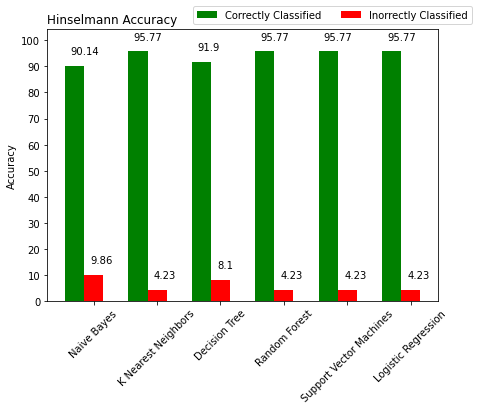

In [196]:
plot_bar(hinselmann_scores,filename="hinselmann_scores",title="Hinselmann Accuracy")

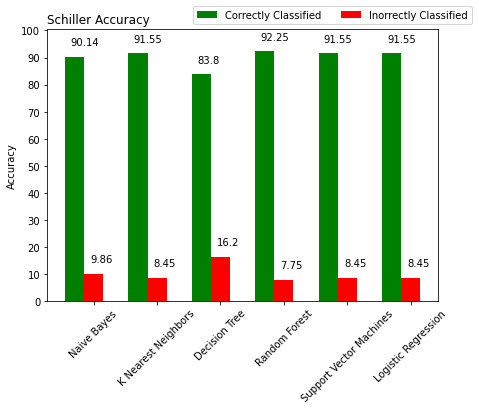

In [197]:
plot_bar(schiller_scores,"schiller_scores","Schiller Accuracy")

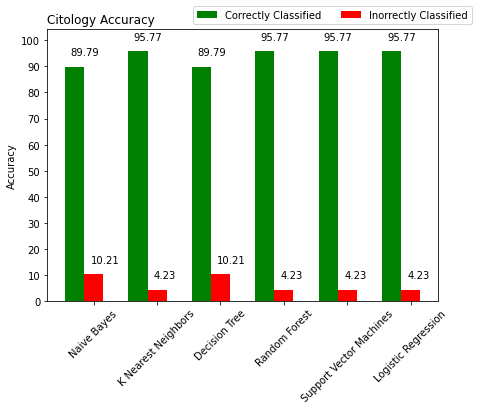

In [198]:
plot_bar(citology_scores,"citology_scores","Citology Accuracy")

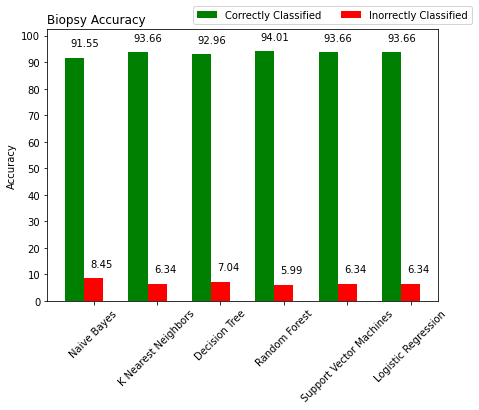

In [199]:
plot_bar(biopsy_scores,"biopsy_scores","Biopsy Accuracy")

## Hinselmann most important 5 features.

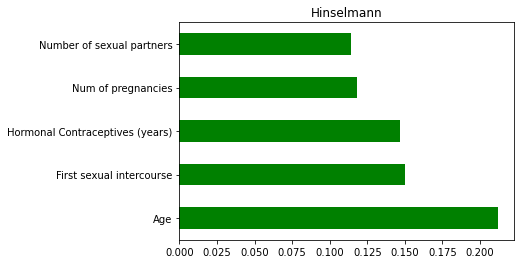

In [200]:
y = Hinselmann
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh', color="green")
plt.title("Hinselmann")
plt.savefig("hinselmann_mst_imp_feat", dpi=plt.gcf().dpi, bbox_inches = 'tight')
plt.show()

## Schiller most important 5 features.

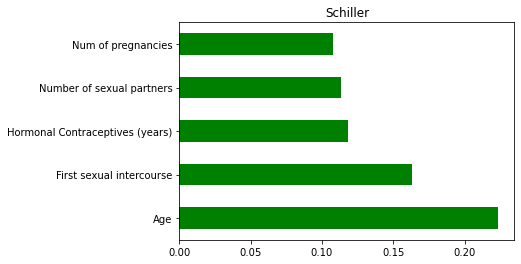

In [201]:
y = Schiller
model2 = ExtraTreesClassifier()
model2.fit(X,y)
feat_importances2 = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances2.nlargest(5).plot(kind='barh', color="green")
plt.title("Schiller")
plt.savefig("schiller_mst_imp_feat", dpi=plt.gcf().dpi, bbox_inches = 'tight')
plt.show()

## Citology most important 5 features

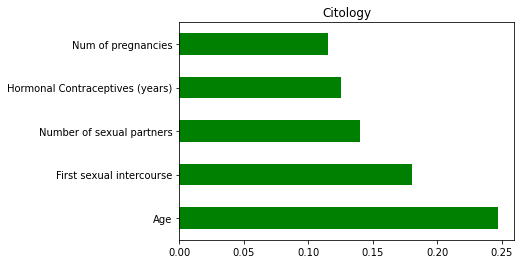

In [202]:
y = Citology
model3 = ExtraTreesClassifier()
model3.fit(X,y)
feat_importances3 = pd.Series(model3.feature_importances_, index=X.columns)
feat_importances3.nlargest(5).plot(kind='barh', color="green")
plt.title("Citology")
plt.savefig("citology_mst_imp_feat", dpi=plt.gcf().dpi, bbox_inches = 'tight')
plt.show()

## Biopsy most important 5 features

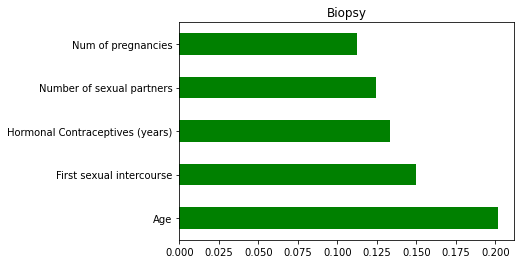

In [203]:
y = Biopsy
model4 = ExtraTreesClassifier()
model4.fit(X,y)
feat_importances4 = pd.Series(model4.feature_importances_, index=X.columns)
feat_importances4.nlargest(5).plot(kind='barh', color="green")
plt.title("Biopsy")
plt.savefig("biopsy_mst_imp_feat", dpi=plt.gcf().dpi, bbox_inches = 'tight')
plt.show()